## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.shape

(249, 5)

In [4]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.shape

(1893, 4)

In [7]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [8]:
# Rename (space)filled column names
# https://www.youtube.com/watch?v=0uBirYFhizE


mouse_metadata.rename(columns = {"Mouse ID":"Mouse_ID", "Drug Regimen":"Drug_Regimen", "Weight (g)":"Weight_g"}, inplace = True)

study_results.rename(columns = {"Mouse ID":"Mouse_ID", "Tumor Volume (mm3)":"Tumor_Volume_mm3", "Metastatic Sites":"Metastatic_Sites"}, inplace = True)

In [9]:

# Combine the data into a single dataset

mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse_ID")


mouse_study




,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
print(mouse_metadata.shape)
print(study_results.shape)
print(mouse_study.shape)


(249, 5)
(1893, 4)
(1893, 8)


In [11]:


# Optional: Get all the data for the duplicate mouse ID. 
# https://www.youtube.com/watch?v=ht5buXUMqkQ&t=145s


mouse_study.duplicated().sum()
mouse_study.loc[mouse_study.duplicated(keep=False),:]








,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [15]:
# Checking the number of mice.
mouse_len = len(mouse_study["Mouse_ID"].unique())
mouse_len



pd.DataFrame({"Total Mice":[mouse_len]})

,Total Mice
0,249


In [16]:

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study.drop_duplicates(subset=["Mouse_ID", "Timepoint"])
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
mouse_len = len(clean_df["Mouse_ID"].unique())
mouse_len



pd.DataFrame({"Total Mice":[mouse_len]})

,Total Mice
0,249


## Summary Statistics

In [18]:
# View Clean Data 
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume_mm3,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# View Tumor_Volume_mm3

clean_df["Tumor_Volume_mm3"]

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor_Volume_mm3, Length: 1888, dtype: float64

In [22]:
# Generate a summary statistics table of 
# mean, 
# median, 
# variance, 
# standard deviation, 
# and SEM 
# of the tumor volume for each regimen

# This method is the most straighforward, 
# creating multiple series and putting them all together at the end.

# https://www.youtube.com/watch?v=txMdrV1Ut64

# Step 1 Create Groupby ("Drug_Regimen")
regimen_type = clean_df.groupby("Drug_Regimen")

# Step 2 Use Aggregate Functions using grouby from step 1 to get xxx for Tumor Volume

regimen_type["Tumor_Volume_mm3"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of 
# mean, 
# median, 
# variance, 
# standard deviation, 
# and SEM 
# of the tumor volume for each regimen

# This method produces everything in a single groupby function


# Step 1 create 'mean_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean
mean_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].mean()

# Step 2 create 'median_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median
median_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].median()

# Step 3 create 'var_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var
var_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].var()

# Step 4 create 'STD_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].STD
std_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].std()

# Step 5 create 'sem_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].SEM
sem_regimen = clean_df.groupby("Drug_Regimen")["Tumor_Volume_mm3"].sem()

summary_data = pd.DataFrame({"Drug_Regimen_Mean":mean_regimen, "Drug_Regimen_Median":median_regimen, "Drug_Regimen_Var":var_regimen, "Drug_Regimen_std":std_regimen, "Drug_Regimen_sem":sem_regimen})

summary_data




,Drug_Regimen_Mean,Drug_Regimen_Median,Drug_Regimen_Var,Drug_Regimen_std,Drug_Regimen_sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

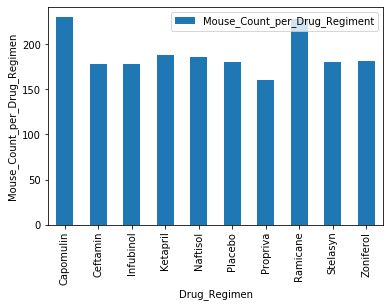

<Figure size 432x288 with 0 Axes>

In [25]:
# Generate a bar plot showing the total number of mice for each 
# treatment throughout the course of the study using pandas.

# Step 1 Groupby total number of mice per treatment
mice_count_treatment = mouse_study.groupby("Drug_Regimen")["Mouse_ID"].count()
mice_count_treatment

# Step 2 Create a data frame 

new_mice_df = pd.DataFrame({"Mouse_Count_per_Drug_Regiment":mice_count_treatment})
new_mice_df

# Step 3 Apply.plot.bar()
#new_mice_df.plot.bar(y = "Mouse_Count per Drug_Regiment")

# or 

# Step 3 (alt. way) Create a bar chart based of the group series
mice_chart = new_mice_df.plot(kind = 'bar')

# Step 3 (alt. way) set xlabel and ylabel using class methods
mice_chart.set_xlabel("Drug_Regimen")
mice_chart.set_ylabel("Mouse_Count_per_Drug_Regimen")

plt.show()
plt.tight_layout()


(0, 250)

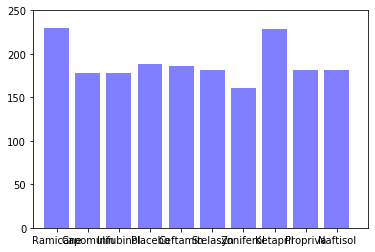

In [90]:
# Generate a bar plot showing the total number of mice 
# for each treatment throughout the course of the study 
# using pyplot.

# Step 1 Groupby Drug Reg and Mouse ID to get count of mice per drug for the Y axis
mice_count_treatment = mouse_study.groupby("Drug_Regimen")["Mouse_ID"].count()
mice_count_treatment

# Step 2 get list of Drug Reg
drug_list = clean_df["Drug_Regimen"].unique()
drug_list


# Step 3 get an array of drug regimens for x axis
x_axis = np.arange(len(drug_list))
x_axis

# Step 4 Tell matplotlib to make bar chart
plt.bar(x_axis, mice_count_treatment, color = 'b', align = "center", alpha = 0.5 )

# Step 5 tell matplotlib where we want to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])

# Step 6 Set the x limits of the xlimits in current chart
plt.xlim(-0.75, 10)
plt.ylim(0, 250)

In [ ]:
# Generate a pie plot showing the distribution 
# of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution 
# of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
